In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
cols = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3',
       'medianb4', 'medianb5', 'medianb6', 'medianb7']
conhecimentos = ['conhecimento_filtrado.csv', 'conhecimento_221067.csv', 'conhecimento_221074.csv', 
                'conhecimento_226070.csv']

<h3>Funçoes</h3>

In [3]:
def configura_df(arquivo):
    global df
    global df1
    global df3
    global df3_full
    df = pd.read_csv(arquivo)
    
    df1 = df[df.verifica==1].copy().reset_index(drop=True)
    df3_full = df[df.verifica==3].copy().reset_index(drop=True)
    
    ids_3 = np.random.choice(df3_full.id, len(df1), replace=False)
    df3 = df[df.id.isin(ids_3)].copy().reset_index(drop=True)
    
    print(arquivo)
    print('df', len(df))
    print('df1', len(df1))
    print('df3', len(df3))
    print('df3_full', len(df3_full))

In [4]:
def plt_desv(d, desvio, media, x, cor):
    depois = media+(d*desvio)
    antes = media-(d*desvio)
    qta = len(x[(x>antes) & (x<depois)])
    label = int((qta*100)/len(x))
    
    plt.axvline(depois, linestyle='dashed', linewidth=0.5, c=cor)
    plt.text(depois, (d*2)/10, ' %s (%s%%)' % (d, label), color=cor)
    
    plt.axvline(antes, linestyle='dashed', linewidth=0.5, c=cor)
    plt.text(antes, (d*2)/10, ' -%s' % d, color=cor)
def densidade(col):
    fig, ax = plt.subplots()
    ax.set_title(col)
    
    ################### - 1 - #####################
    x = df1[col]
    media = np.mean(x)
    mediana = np.median(x)
    desvio = np.std(x)
    x.plot.kde(ax=ax, legend=False, c='r', figsize=(15,8))
    plt.axvline(media, linestyle='dashed', linewidth=2, c='red')
    plt.text(media,3, ' Média', color='red')
    
    plt.axvline(mediana, linestyle='solid', linewidth=2, c='red')
    plt.text(mediana,0, ' Mediana', color='red')

    plt_desv(1, desvio, media, x, '#ffa284')
    plt_desv(2, desvio, media, x, '#ff7b5a')
    plt_desv(3, desvio, media, x, 'red')
    ################### - 3 - #####################
    x = df3_full[col]
    media = np.mean(x)
    mediana = np.median(x)
    desvio = np.std(x)
    x.plot.kde(ax=ax, legend=False, c='b', figsize=(15,8))
    plt.axvline(media, linestyle='dashed', linewidth=2, c='blue')
    plt.text(media,3, ' Média', color='blue')
    plt.axvline(mediana, linestyle='solid', linewidth=2, c='blue')
    plt.text(mediana,0, ' Mediana', color='red')

    plt_desv(1, desvio, media, x, '#cfb1ff')
    plt_desv(2, desvio, media, x, '#9265ff')
    plt_desv(3, desvio, media, x, 'blue')

In [5]:
def distribuicao(col):
    fig, ax = plt.subplots()
    ax.set_title(col)
    df1[col].plot(ax=ax, legend=False, c='r', figsize=(15,8))
    df3[col].plot(ax=ax, legend=False, c='b', figsize=(15,8))
    
def compara(col):
    fig, ax = plt.subplots()
    ax.set_title(col)
    df1[col].plot.kde(ax=ax, legend=False, c='r', figsize=(15,8))
    df3[col].plot.kde(ax=ax, legend=False, c='b', figsize=(15,8))
    df3_full[col].plot.kde(ax=ax, legend=False, c='g', figsize=(15,8))

In [6]:
configura_df('conhecimento_226070.csv')

conhecimento_226070.csv
df 25179
df1 2782
df3 2782
df3_full 22397


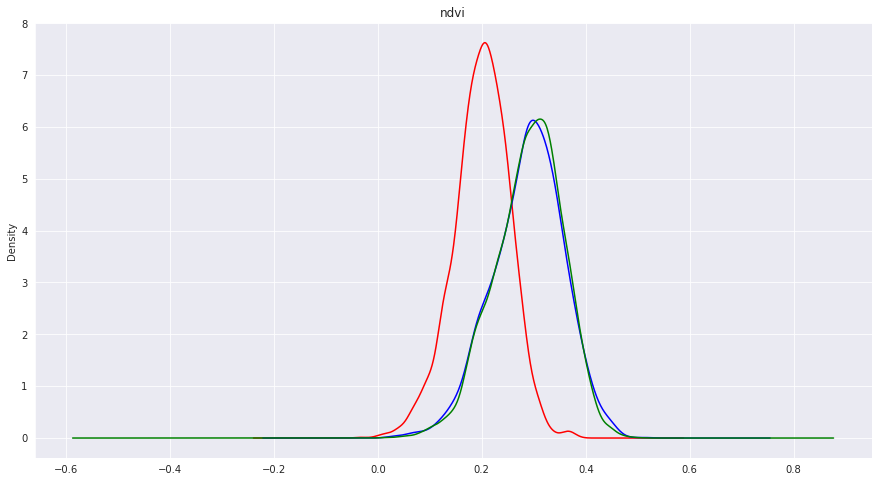

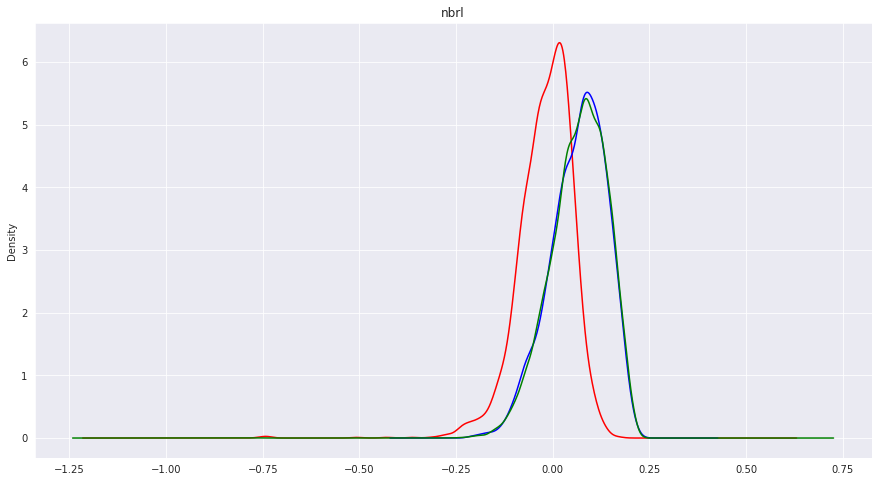

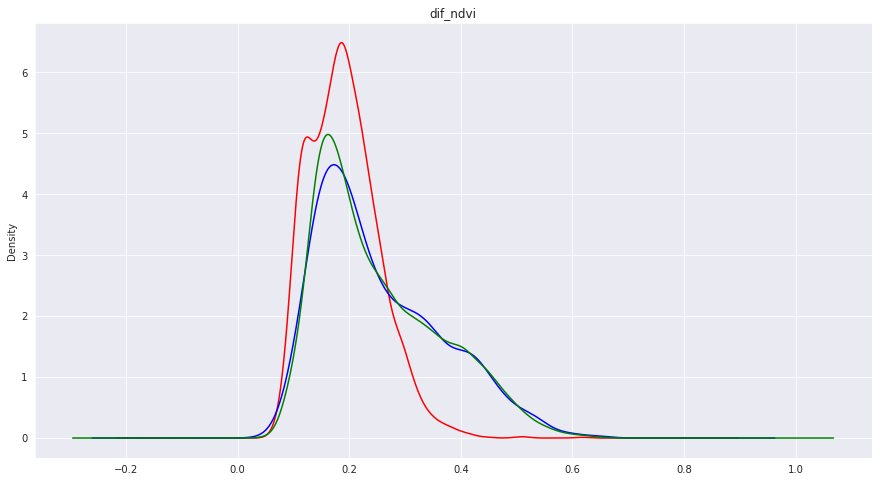

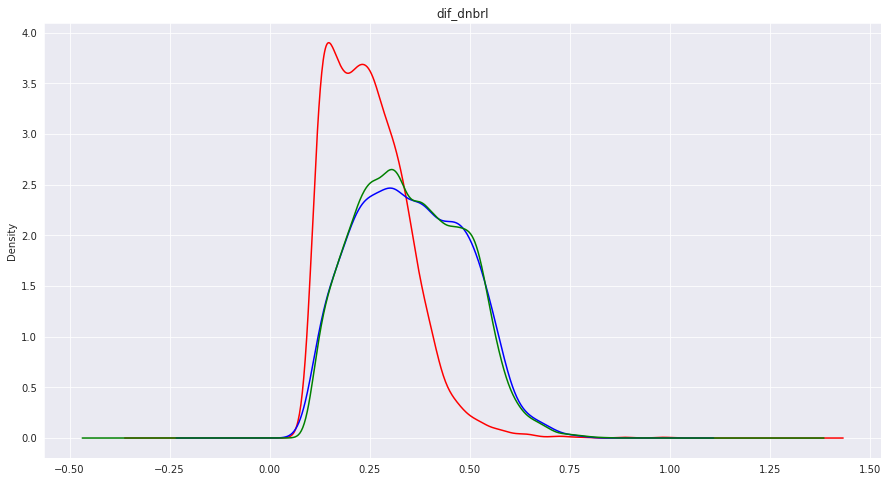

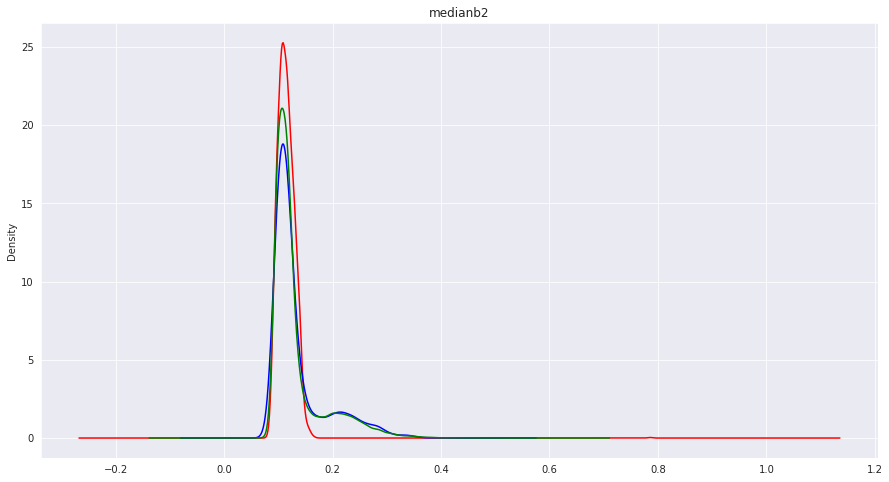

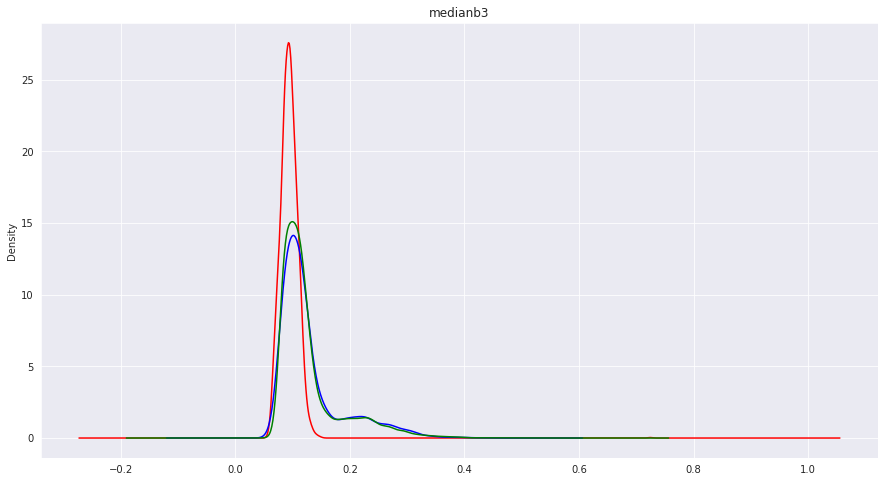

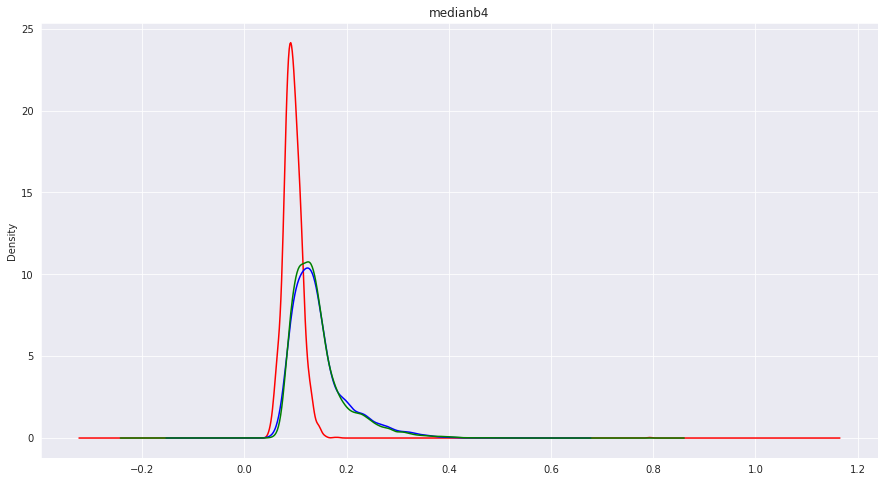

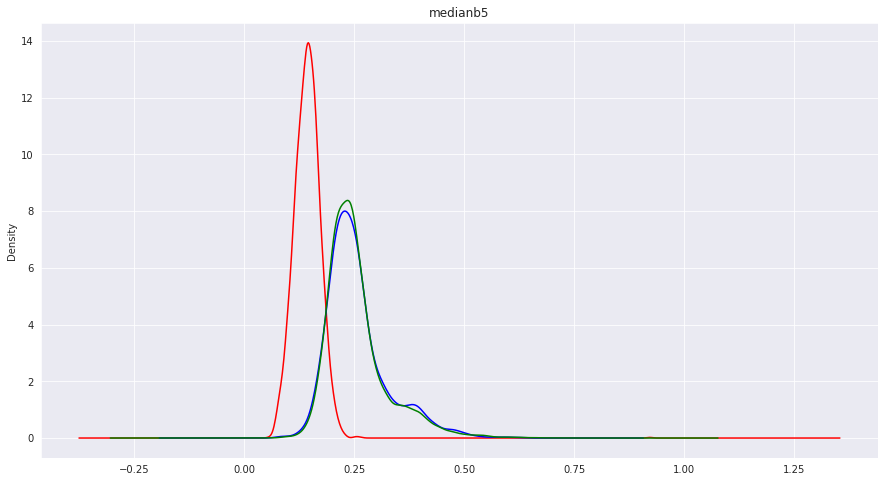

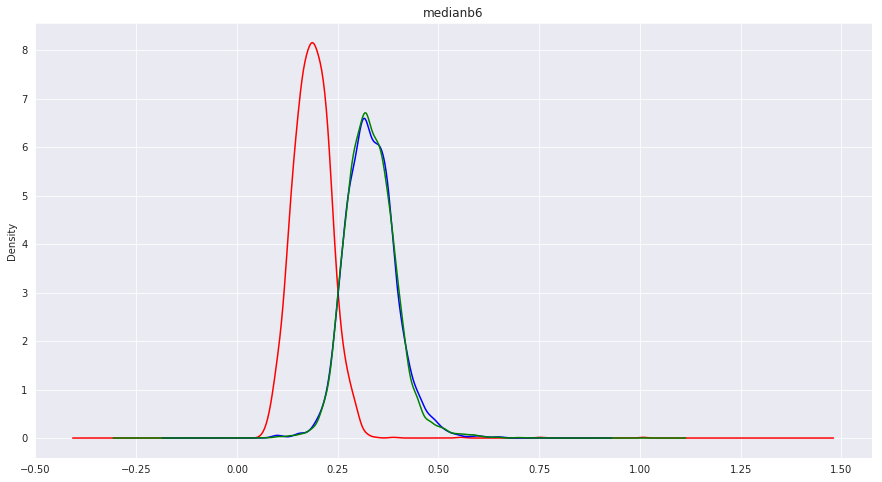

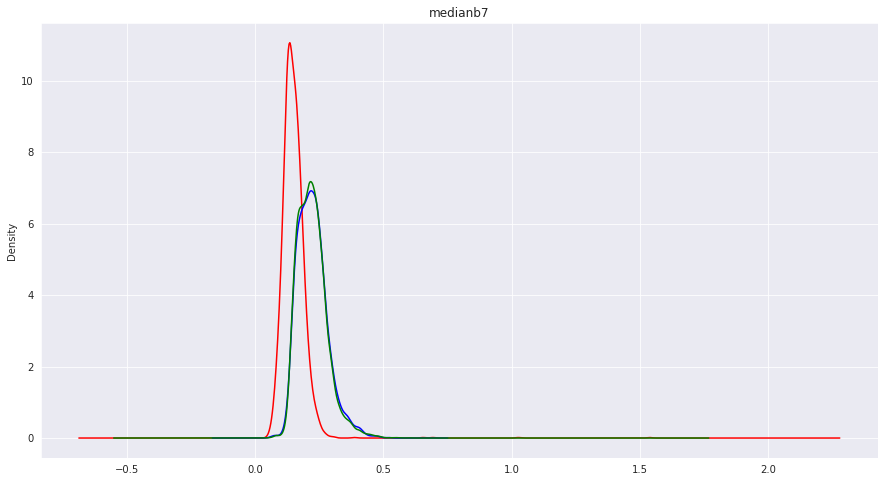

In [7]:
for col in cols:
    compara(col)

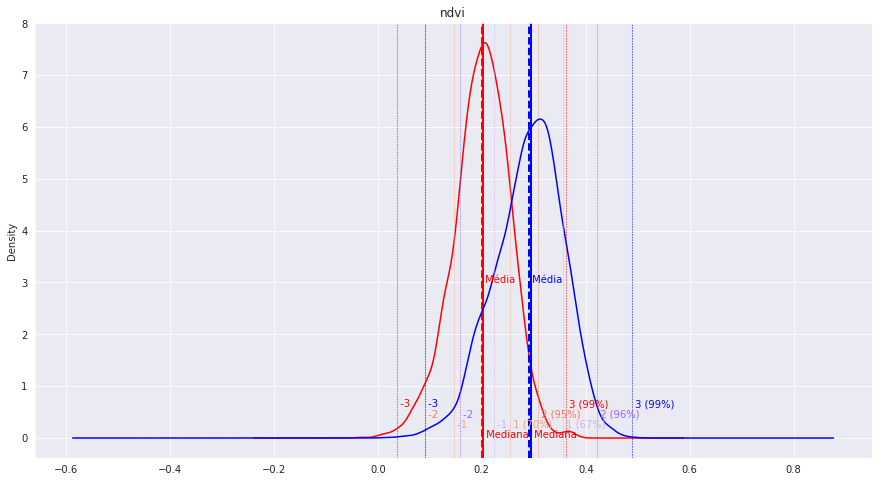

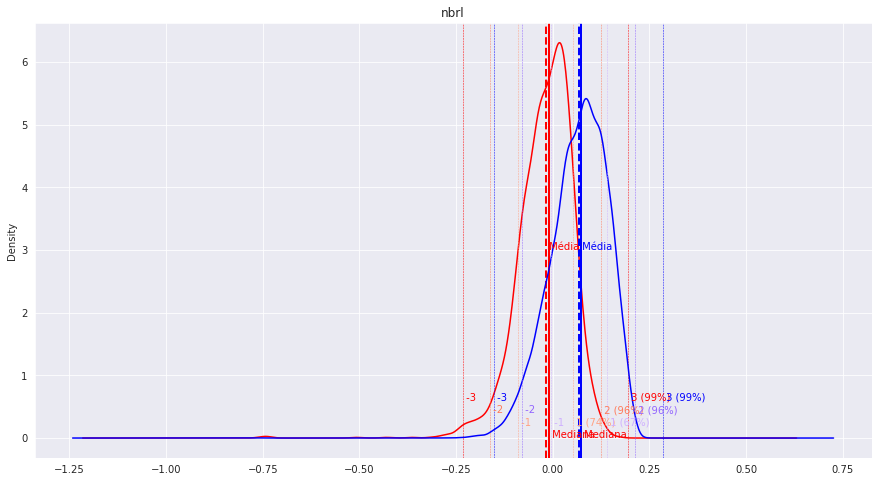

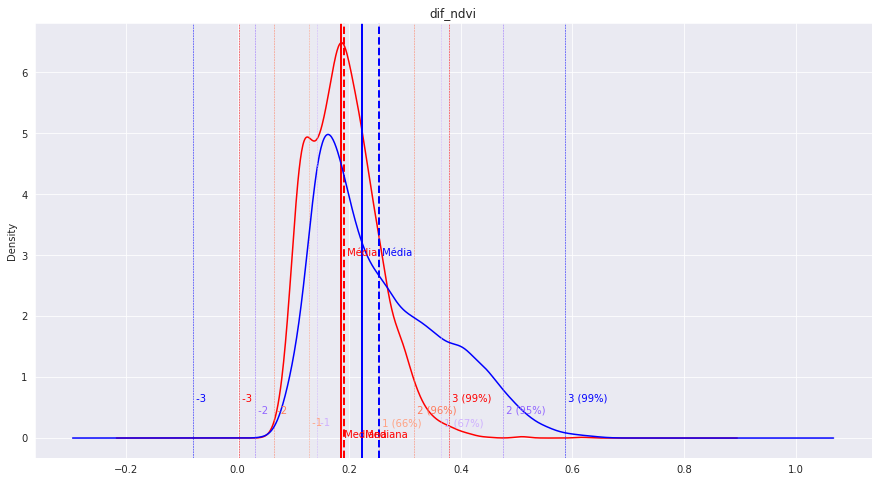

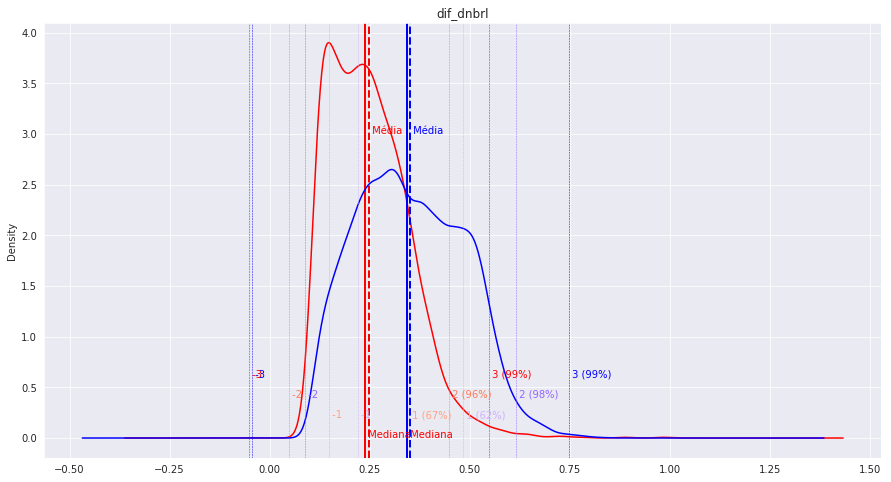

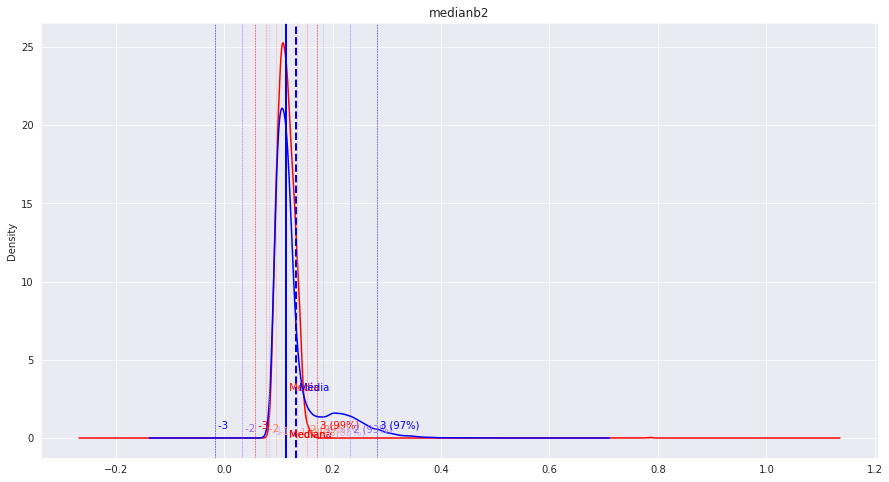

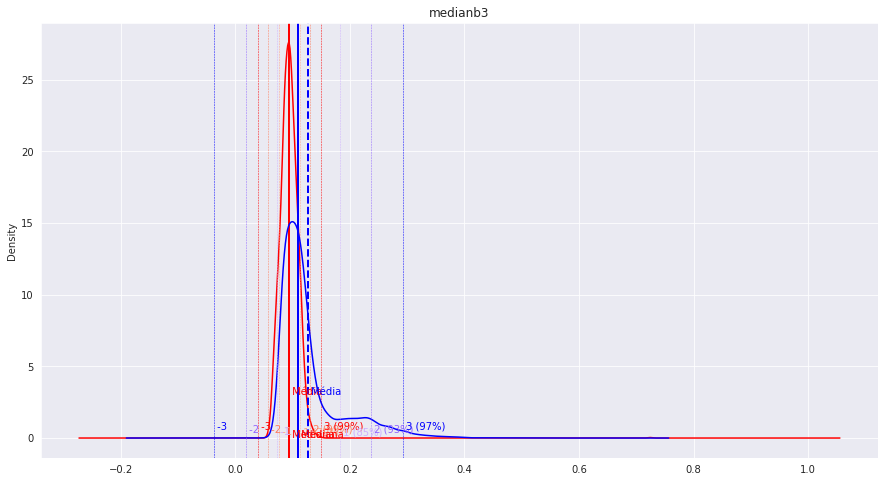

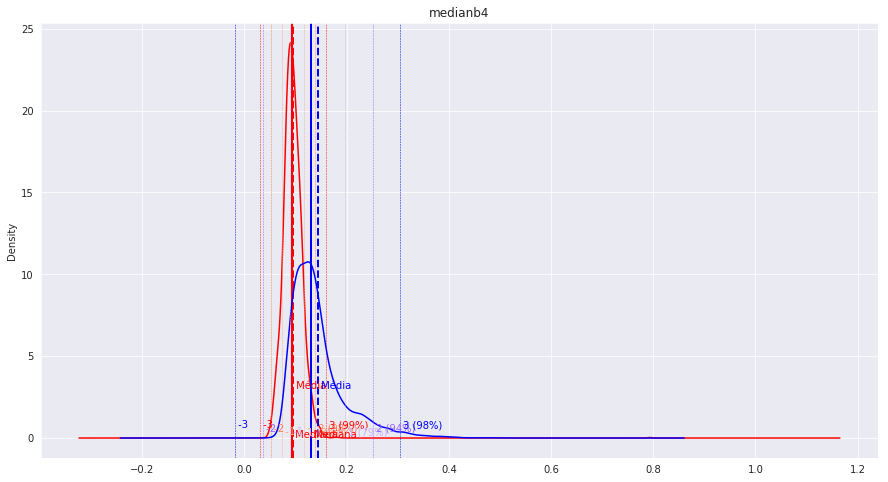

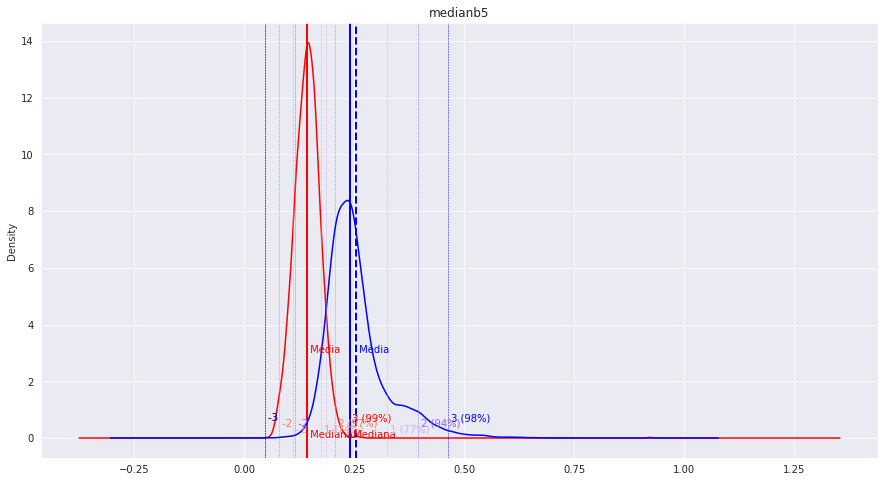

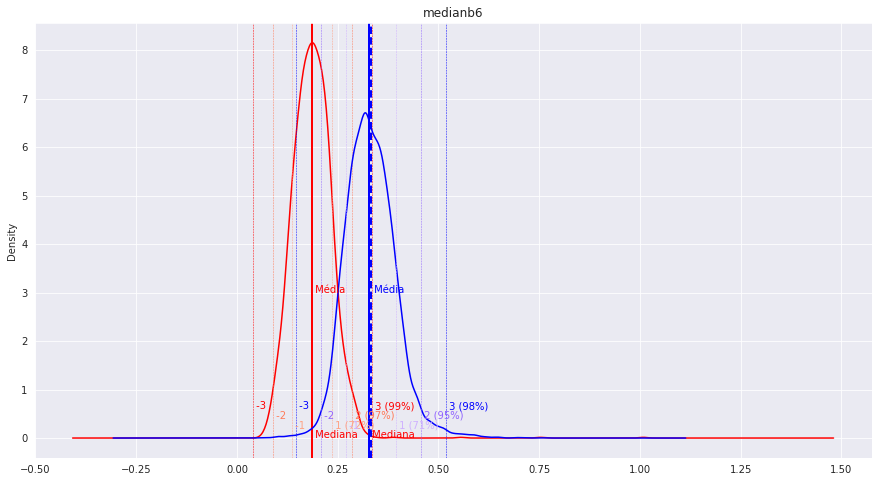

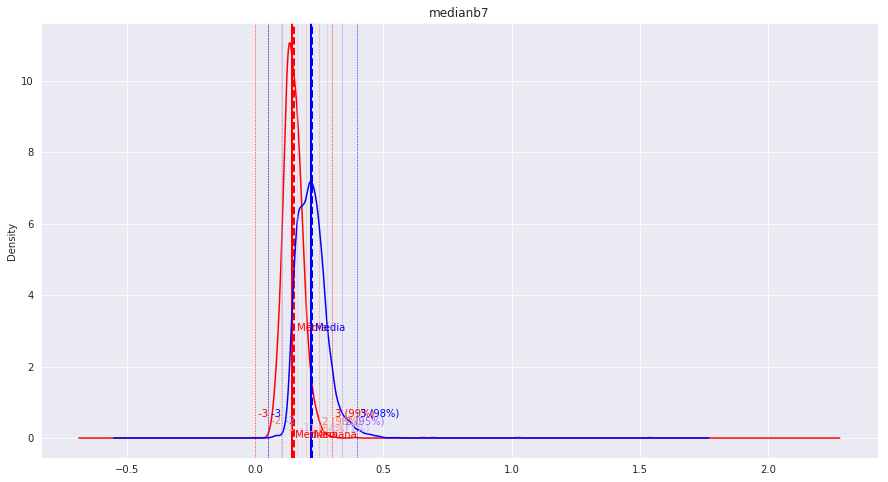

In [8]:
for col in cols:
    densidade(col)

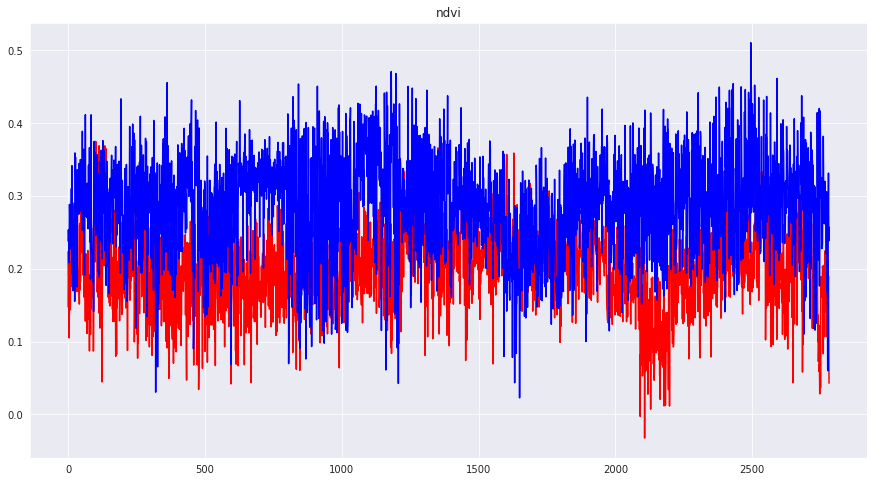

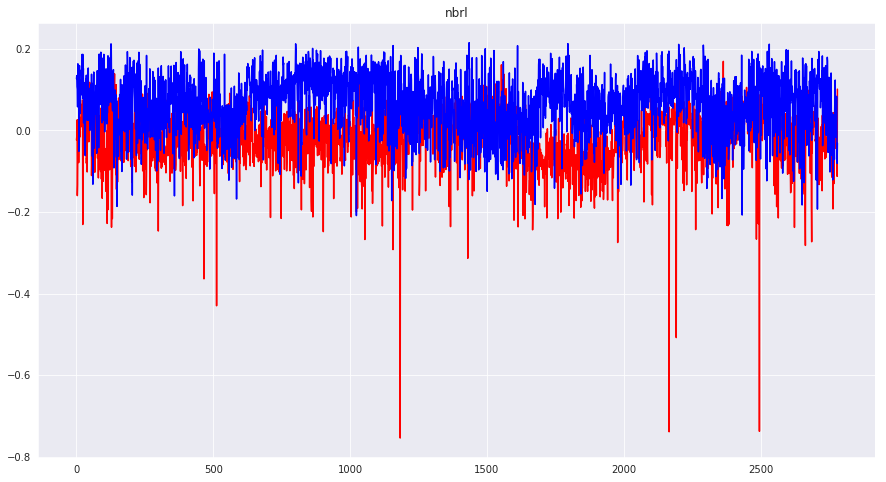

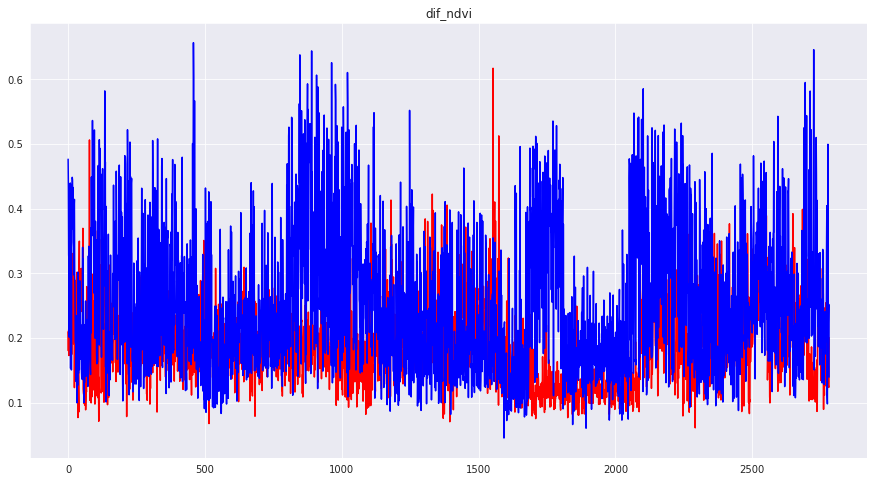

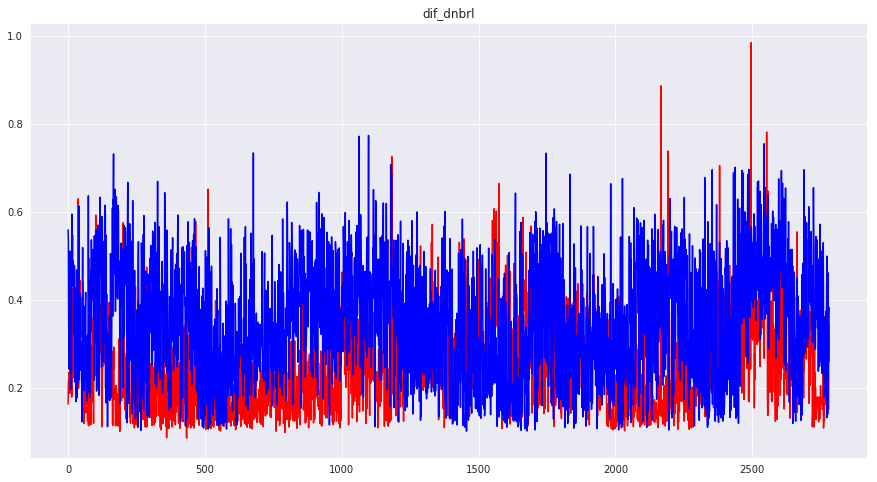

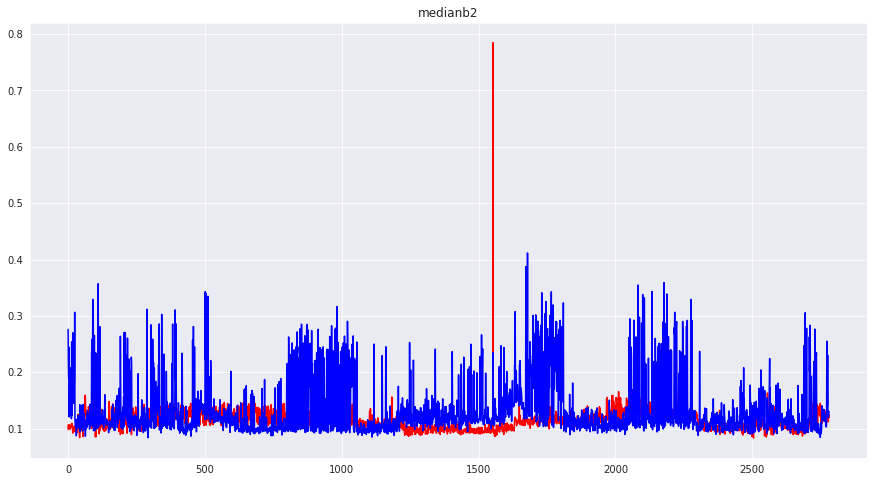

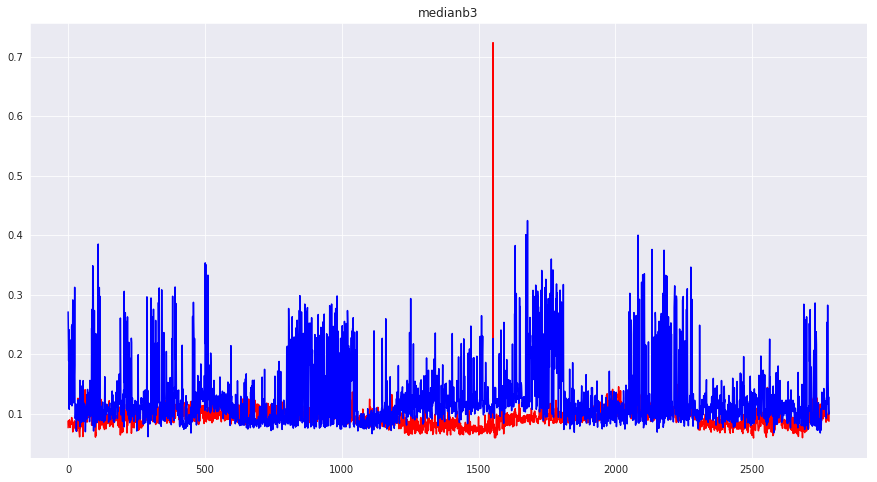

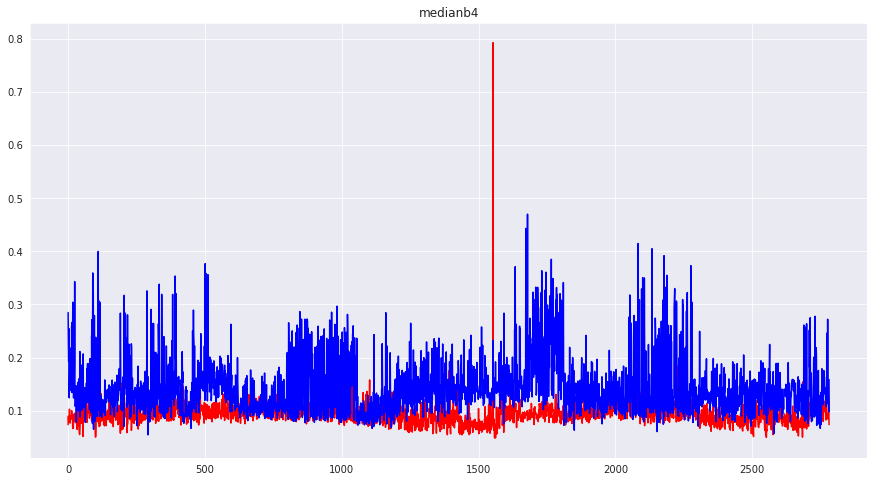

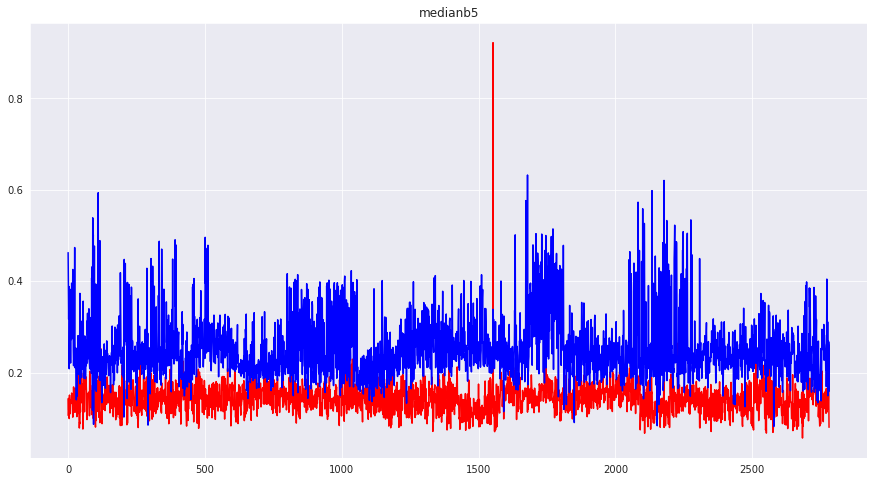

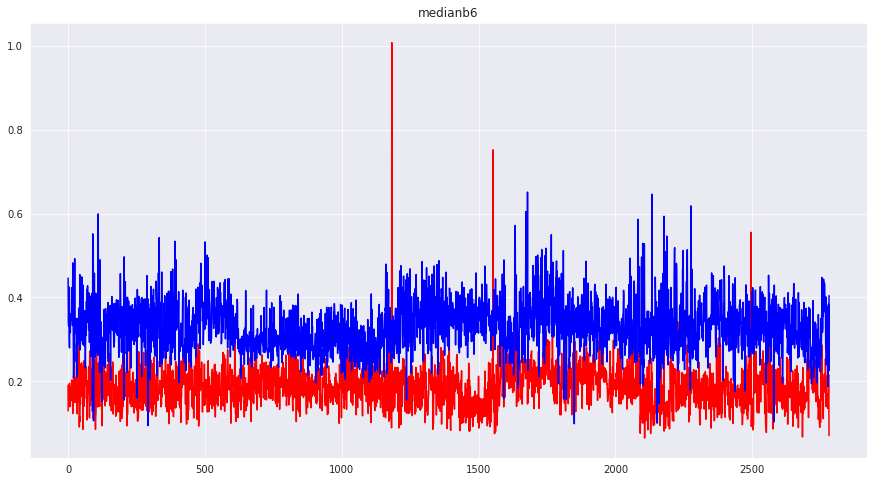

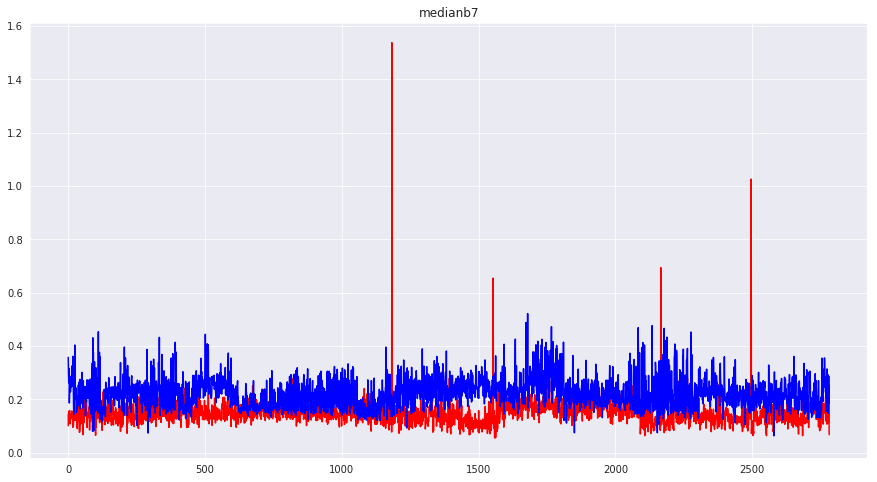

In [9]:
for col in cols:
    distribuicao(col)